In [109]:
import io
import re
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_params
from statsmodels.iolib.summary2 import summary_col

In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/Diana-Ugolnikova/econometrics/main/Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [47]:
df = df.replace(to_replace=['Male','Female'], value=[1,0])

In [48]:
df = df.rename(columns={'Annual Income ($)':'AnnualIncome'})
df

,CustomerID,Gender,Age,AnnualIncome,Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,Healthcare,1,4
1,2,1,21,35000,81,Engineer,3,3
2,3,0,20,86000,6,Engineer,1,1
3,4,0,23,59000,77,Lawyer,0,2
4,5,0,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,Artist,8,7
1996,1997,0,91,73158,32,Doctor,7,7
1997,1998,1,87,90961,14,Healthcare,9,2
1998,1999,1,77,182109,4,Executive,7,2


$$
AnnualIncome = \beta_0 + \beta_1 * Gender + \beta_2 * Age
$$

In [49]:
model = smf.ols(formula = 'AnnualIncome~Gender+Age', data=df).fit()
model.params.round(3)

Intercept    108876.614
Gender          426.040
Age              34.351
dtype: float64

$$
AnnualIncome = 108876.614 + 426.040 * Gender + 34.351 * Age
$$

1. При увеличении возраста на 1 единицу годовой заработок увеличивается на 34.351, при прочих равных
2. Если работающий человек - женщина, то заработная плата увеличивается на 426.040

## Зависимость годового заработка от пола

<AxesSubplot:xlabel='Gender', ylabel='AnnualIncome'>

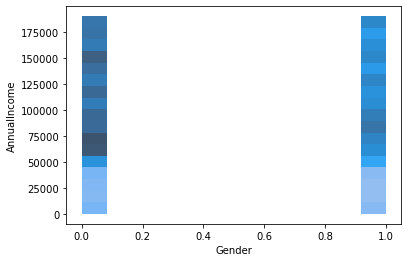

In [50]:
sns.histplot(data=df, x='Gender', y='AnnualIncome')

#### До этого мы заменили Male на 1, а Female на 0
#### На этой диаграмме мы видим, что женщины чаще получают высокую заработную плату, чем мужчины (делаем вывод исходя из насыщенности цвета)
#### У женщин заработная плата чаще составляет около 70000-75000 ден.единиц, у мужчин в целом равномерное распределение заработка, но можно заметить, что их заработная плата чаще составляет около 80000-90000 ден.единиц

## График показывающий зависимость годового заработка от возраста

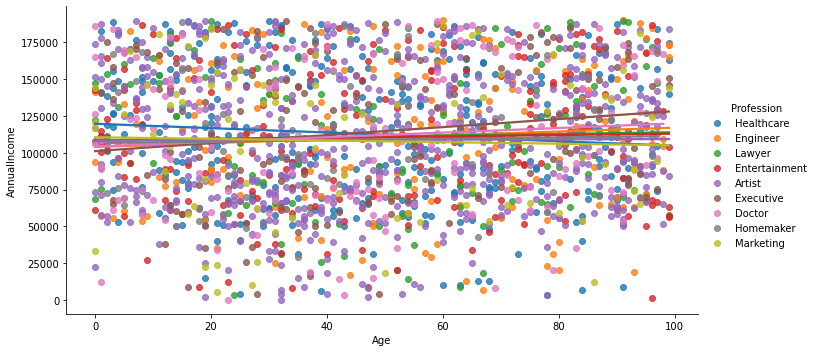

In [51]:
sns.lmplot(data = df, x = 'Age', y = 'AnnualIncome', ci=None, hue='Profession',height = 5, aspect = 2)

#### На данном графике видно, что в основном среднегодовой заработок выше 50000 ден.единиц у большинства профессий
#### Также стоит отметить, что все линии пересекаются примерно в одной области, можно сделать вывод о том, что в возрасте примерно от 40 до 45 лет люди чаще всего достигают годового заработка в 100000 ден. единиц


<AxesSubplot:xlabel='Age', ylabel='AnnualIncome'>

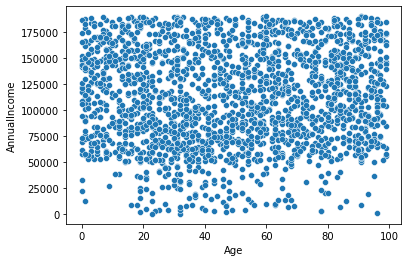

In [52]:
sns.scatterplot(data=df, y = 'AnnualIncome', x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='AnnualIncome'>

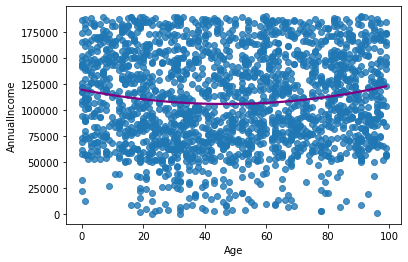

In [53]:
sns.regplot(data=df, y = 'AnnualIncome', x = 'Age', ci=None, order = 2, line_kws ={"color":"purple"})

#### На основе полученной модели можно сделать вывод что, чем больше возраст человек, тем выше его годовой заработок

##### P.S да, немного косячный датасет, оказалось, что даже в "0" лет можно зарабатывать большие деньги, но меня, как эконометриста, это не особо волнует, поэтому, можно продолжить анализ

In [54]:
df['Age^2']  = df['Age']*df['Age']
df

,CustomerID,Gender,Age,AnnualIncome,Spending Score (1-100),Profession,Work Experience,Family Size,Age^2
0,1,1,19,15000,39,Healthcare,1,4,361
1,2,1,21,35000,81,Engineer,3,3,441
2,3,0,20,86000,6,Engineer,1,1,400
3,4,0,23,59000,77,Lawyer,0,2,529
4,5,0,31,38000,40,Entertainment,2,6,961
...,...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,Artist,8,7,5041
1996,1997,0,91,73158,32,Doctor,7,7,8281
1997,1998,1,87,90961,14,Healthcare,9,2,7569
1998,1999,1,77,182109,4,Executive,7,2,5929


$$
AnnualIncome = \beta_0 + \beta_1 * Gender + \beta_2 * Age^2
$$

<AxesSubplot:xlabel='Age^2', ylabel='AnnualIncome'>

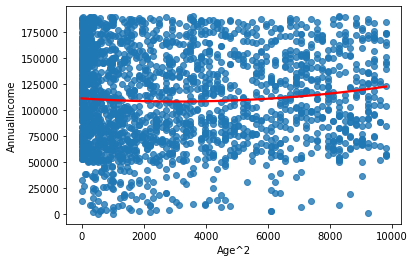

In [55]:
sns.regplot(data = df, y = 'AnnualIncome', x = 'Age^2', ci=None, order = 2, line_kws ={"color":"red"})

#### Мы изменили зависимость с линейной на квадратическую
#### Итак, на данной модели можно наблюдать концентрацию значений наблюдений в начале координат, соответственно при использовании переменной второго порядка изменяется изгиб кривой (незначительно) и увеличивается точность предсказания. 

Перейдем к вычислению TSS, RSS, ESS

In [56]:
## TSS
model.centered_tss.round(3)

4182118327701.276

#### TSS = 4182118327701.276

In [57]:
## ESS
model.ess.round(3)

1998841648.713

#### ESS = 1998841648.713

In [58]:
## RSS
RSS = model.ssr.round(3)
RSS

4180119486052.563

#### RSS = 4180119486052.56

In [59]:
# R^2
model.rsquared.round(5)

0.00048

#### R^2 = 0.00048

### Так как значение коэффициента детерминации близко к 0, следовательно модель недостаточно точная

In [60]:
models = smf.ols(data=df, formula='AnnualIncome~Age+Gender').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AnnualIncome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4775
Date:                Thu, 11 May 2023   Prob (F-statistic):              0.620
Time:                        18:45:34   Log-Likelihood:                -24298.
No. Observations:                2000   AIC:                         4.860e+04
Df Residuals:                    1997   BIC:                         4.862e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.089e+05   2202.995     49.422      0.000    1.05e+05    1.13e+05
Age           34.3507     35.994      0.954      0.340     -36.240     104.941
Gender       426.0398   2082.443      0.205      0.838   -3657.949    4510.028
==============================================================================
Omnibus:                      210.225   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.812
Skew:                          -0.113   Prob(JB):                     1.39e-14
Kurtosis:                       2.154   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
models = smf.ols(data=df, formula='AnnualIncome~Age+Gender').fit()
models.summary(alpha = 0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.089e+05,2202.995,49.422,0.000,1.05e+05,1.13e+05
Age,34.3507,35.994,0.954,0.340,-36.240,104.941
Gender,426.0398,2082.443,0.205,0.838,-3657.949,4510.028


In [62]:
data_string = ''' coef std.err
Intercept    108876.614 2202.995
Age              34.351 35.994
Gender          426.040 2082.443'''

In [63]:
df = pd.read_csv(io.StringIO(data_string), sep='\s+')
df

,coef,std.err
Intercept,108876.614,2202.995
Age,34.351,35.994
Gender,426.040,2082.443


In [64]:
df['t_nabl'] = df['coef']/df['std.err']
df

,coef,std.err,t_nabl
Intercept,108876.614,2202.995,49.422089
Age,34.351,35.994,0.954354
Gender,426.040,2082.443,0.204587


In [65]:
t_cr = stats.t.ppf(1-0.05/2, 400 - 3 - 1)
t_cr

1.9659726084694749

$$
t_{critical}=1.966
$$

In [66]:
df['Znachimosty'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nabl']) >t_cr else 'ne znachim', axis = 1)
df

,coef,std.err,t_nabl,Znachimosty
Intercept,108876.614,2202.995,49.422089,znachim
Age,34.351,35.994,0.954354,ne znachim
Gender,426.040,2082.443,0.204587,ne znachim


 ##### коэффициент Intercept является значимым

## перейдем к F-test

In [44]:
df = df.rename(columns={'Annual Income ($)':'AnnualIncome', 'Work Experience' : 'WorkExperience', 'Family Size':'FamilySize', 'Spending Score (1-100)' : 'SpendingScore'})
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


$$
H0: \beta_{AnnualIncome}=\beta_{Gender}=\beta_{Age}=\beta_{WorkExperience}=\beta_{FamilySize}=0
$$
$$
H1: \beta_{AnnualIncome}^2+\beta_{Gender}^2+\beta_{Age}^2+\beta_{WorkExperience}^2+\beta_{FamilySize}^2>0
$$

In [47]:
model = smf.ols(formula = 'AnnualIncome~Gender+Age+WorkExperience+FamilySize', data=df).fit()
model.params.round(3)

Intercept         96918.549
Gender[T.Male]      255.630
Age                  30.787
WorkExperience     1029.384
FamilySize         2117.250
dtype: float64

In [49]:
# RSS 
RSS2 = model.ssr.round(3)
RSS2

4111965533286.597

In [50]:
# TSS 
TSS2 = model.centered_tss.round(3)
TSS2

4182118327701.276

In [51]:
#R^2 
R2_2 = RSS2/TSS2
R2_2

0.983225535741061

In [52]:
unrest, rest = np.float_(re.findall(r'([-+]?\d+.\d+)','R2                      0.576          0.98'))
print (unrest, rest)

0.576 0.98


In [53]:
F_obs = (unrest - rest)/(1-unrest)*(5000 - 13)/4
F_obs

-1187.941037735849

In [54]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha, 4, 5000-13)
F_cr

2.373713672224553

$$
F_{obs}<F{cr}; 
$$

Вывод:Данные согласуются с гипотезорй Н0

## Доверительные интервалы

In [87]:
models = smf.ols(data=df, formula='AnnualIncome~Age+Gender').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AnnualIncome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4775
Date:                Thu, 11 May 2023   Prob (F-statistic):              0.620
Time:                        19:17:24   Log-Likelihood:                -24298.
No. Observations:                2000   AIC:                         4.860e+04
Df Residuals:                    1997   BIC:                         4.862e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.089e+05   2202.995     49.422      0.000    1.05e+05    1.13e+05
Gender[T.Male]   426.0398   2082.443      0.205      0.838   -3657.949    4510.028
Age               34.3507     35.994      0.954      0.340     -36.240     104.941
==============================================================================
Omnibus:                      210.225   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.812
Skew:                          -0.113   Prob(JB):                     1.39e-14
Kurtosis:                       2.154   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
df_table = pd.read_html(model.summary().tables[1].as_html(), header = 0, index_col = 0)[0]
df_table

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,108900.0000,2202.995,49.422,0.000,105000.000,113000.000
Gender,426.0398,2082.443,0.205,0.838,-3657.949,4510.028
Age,34.3507,35.994,0.954,0.340,-36.240,104.941


In [98]:
alpha = 0.05

In [90]:
nobs = model.nobs
regr_cnt = model.df_model + 1
t_cr = stats.t.ppf(1-alpha/2, nobs - regr_cnt)

In [91]:
regr_cnt

3.0

In [93]:
nobs

2000.0

In [95]:
t_cr

1.961152610098764

In [ ]:
#количество регрессоров + 1 = 3
#количество наблюдений = 2000
#критическое значение = 1.961
#уровень значимости 5%

In [99]:
df_table['lower'] = (df_table['coef'].astype(float) - df_table['std err'].astype(float)*t_cr).round(2)
df_table['upper'] = (df_table['coef'].astype(float) + df_table['std err'].astype(float)*t_cr).round(2)
df_table

,coef,std err,t,P>|t|,[0.025,0.975],lower,upper
Intercept,108900.0000,2202.995,49.422,0.000,105000.000,113000.000,104579.59,113220.41
Gender,426.0398,2082.443,0.205,0.838,-3657.949,4510.028,-3657.95,4510.03
Age,34.3507,35.994,0.954,0.340,-36.240,104.941,-36.24,104.94


## Мультиколлинеарность

In [29]:
model__0 = smf.ols(data = df , formula = 'AnnualIncome~Age+WorkExperience+FamilySize+Profession').fit()
model__1 = smf.ols(data = df , formula = 'Age~WorkExperience+FamilySize+Profession').fit()
model__2 = smf.ols(data = df , formula = 'WorkExperience~Age+FamilySize+Profession').fit()
model__1.params.round(3)

Intercept                      47.423
Profession[T.Doctor]           -2.385
Profession[T.Engineer]          6.105
Profession[T.Entertainment]     1.963
Profession[T.Executive]        -2.570
Profession[T.Healthcare]       -1.318
Profession[T.Homemaker]        -3.672
Profession[T.Lawyer]           -1.298
Profession[T.Marketing]        -3.214
WorkExperience                 -0.094
FamilySize                      0.542
dtype: float64

In [30]:
model__1.rsquared

0.00902102160694318

In [31]:
VIF_1 = 1/(1 - model__1.rsquared.round(3))
VIF_1.round(2)

1.01

In [32]:
VIF_2 = 1/(1 - model__2.rsquared.round(3))
VIF_2.round(2)

1.01

## Дамми-переменные

$$
Н0: \beta_{AnnualIncome}=\beta_{Age}=\beta_{FamilySize}=\beta{Gender}=0
$$
$$
H1: \beta_{AnnualIncome}^2+\beta_{Age}^2+\beta_{FamilySize}^2+\beta{Gender}^2>0
$$

In [56]:
data_string = '''R2                      0.00048          0.983  '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', data_string)) 

In [57]:
F_obs = (unrest - rest)/(1-unrest)*(935-10)/5
F_obs.round(2)

10692.13

In [58]:
alpha = 0.05 
F_cr = stats.f.ppf(1-alpha,4,706-8)
F_cr

2.384692685857469

$$
F_{obs}>F_{cr}
$$

=> Не принимаем гипоезу H0

## Гетероскедастичность

In [62]:
df['res2']=model.resid**2
df['res']=model.resid

In [63]:
 sub_model= smf.ols(data=df, formula='res2~Age+WorkExperience+FamilySize').fit()

$$
H0:\gamma_{1}=\gamma_{2}=\gamma_{3}=0
$$
$$
H1:\gamma_{1}^2+\gamma_{2}^2+\gamma_{3}^2>0
$$

In [65]:
St = np.round(len(df)*sub_model.rsquared,2)
St

26.54

In [66]:
Hi2 = stats.chi2.ppf(1-0.05,6)
Hi2

12.591587243743977

$$
Тест указывает на гетероскедастичность

$$
Отвергаем гипотезу Н0


## Серийная корреляция

In [73]:
model.resid

0      -92257.514833
1      -72260.606126
2      -14680.920785
3      -42861.147842
4      -74635.212496
            ...     
1995    62226.758258
1996   -48588.595206
1997   -22390.593207
1998    71124.043491
1999     1283.582122
Length: 2000, dtype: float64

In [68]:
resSq = sum(model.resid**2)

In [71]:
sum_resid = 0
for i in range(len(model.resid)-1):
    sum_resid+=(model.resid[i+1]-model.resid[i])**2
sum_resid

6001641378903.204


$$
H0:p = 0
$$
$$
H1:p ≠ 0
$$

In [74]:
sum_resid/resSq

1.4595553708608635

In [ ]:
Гипотеза Н0 отвергается